## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In this jupyter notebook we will be looking at data from the King's County House Sales dataset.  The goal of this project is to make recommendations to a real estate business as to which houses will create a larger profit for them.  In doing so I will be looking at 3 main factors.  The first factor I will explore will be location.  The location of a house for sale could possibly change the price of a house due to things like nice views, good schools, entertainment close by, and other various factors. While the dataset does not include these specifics, if houses on one zip code tend to be higher in price than another we can assume that this zipcode is more desirable.  The second factor I will be looking at will be the size of a house.  A larger house could effect the overall price of the home, and I will also be looking to see if at any point a house is "too big" to see if this effects price aswell.  For the third factor, I will be looking to see if renovations increase the overall price of a house. If any of these 3 factors are more influential to the overall sale price of a house, that will be noted aswell.

1.) Location of house based on zipcode vs price
2.) Size of house vs price
3.) Renovations vs price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import csv file Kings County House Sales dataset
kc_house_data = pd.read_csv(r'data\kc_house_data.csv')

In [33]:
#removing alphabetical characters from column "grade"
kc_house_data['grade'] = kc_house_data['grade'].str.replace('[a,A,b,B,c,C,d,D,e,E,f,F,g,G,h,H,i,I,j,J,k,K,l,L,m,M,n,N,o,O,p,P,q,Q,r,R,s,S,t,T,u,U,v,V,w,W,x,X,y,Y,z,Z]','')

In [37]:
#changing datatype of column "grade"
kc_house_data['grade'] = kc_house_data['grade'].astype(int)

In [58]:
kc_house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,NONE,...,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,NONE,...,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,NONE,...,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,NONE,...,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,NONE,...,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.00,3,2.50,1530,1131,3.00,NO,NONE,...,8,1530,0.0,2009,0.00,98103,47.70,-122.35,1530,1509
21593,6600060120,2/23/2015,400000.00,4,2.50,2310,5813,2.00,NO,NONE,...,8,2310,0.0,2014,0.00,98146,47.51,-122.36,1830,7200
21594,1523300141,6/23/2014,402101.00,2,0.75,1020,1350,2.00,NO,NONE,...,7,1020,0.0,2009,0.00,98144,47.59,-122.30,1020,2007
21595,291310100,1/16/2015,400000.00,3,2.50,1600,2388,2.00,NaN,NONE,...,8,1600,0.0,2004,0.00,98027,47.53,-122.07,1410,1287


In [40]:
#checking datatypes of columns
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  int32  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### exploratory analysis for price based on zipcode

viewing values that are empty in the column of price

In [41]:
# Checking for empty values of price
kc_house_data[kc_house_data['price'] == 'NaN']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


No values are 'NaN' in the price column

In [42]:
## Checking for empty values of price
kc_house_data[kc_house_data['price'] == '']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


No values are empty in the price column

 1.) location.  The plan here is to groupby zipcode.  Then find the average price of each house in each zipcode. Next I will plot each zipcode with its corresponding average price.  This should give me a good insight into which zipcodes have houses that on average sell for more than houses in other zipcodes.

In [43]:
#groupby based on location(zipcode)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
location_group = kc_house_data.groupby('zipcode').mean()

In [44]:
#resetting index so zipcode is first column, not the index.
location_group = location_group.rename_axis('Zipcode').reset_index()

In [64]:
#sorting price by descending
kc_house_data.sort_values(by = 'grade', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9245,9208900037,9/19/2014,6890000.00,6,7.75,9890,31374,2.00,NO,EXCELLENT,...,13,8860,1030.0,2001,0.00,98039,47.63,-122.24,4540,42730
6035,1725059316,11/20/2014,2390000.00,4,4.00,6330,13296,2.00,NO,AVERAGE,...,13,4900,1430.0,2000,0.00,98033,47.65,-122.20,2200,9196
13398,2426039123,1/30/2015,2420000.00,5,4.75,7880,24250,2.00,NO,AVERAGE,...,13,7880,0.0,1996,0.00,98177,47.73,-122.36,2740,10761
4407,2470100110,8/4/2014,5570000.00,5,5.75,9200,35069,2.00,NO,NONE,...,13,6200,3000.0,2001,nan,98039,47.63,-122.23,3560,24345
10362,3303850390,12/12/2014,2980000.00,5,5.50,7400,18898,2.00,NO,GOOD,...,13,6290,1110.0,2001,0.00,98006,47.54,-122.11,6110,26442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7966,3122069029,6/19/2014,120000.00,2,1.00,990,39964,1.00,NO,NONE,...,4,990,0.0,1945,0.00,98042,47.36,-122.08,1560,8990
1065,3340401535,11/5/2014,140000.00,1,1.00,730,6890,1.00,NO,NONE,...,4,730,0.0,1926,0.00,98055,47.47,-122.22,1790,7969
16516,2114700500,4/18/2015,90000.00,1,1.00,560,4120,1.00,NO,NONE,...,4,560,0.0,1947,0.00,98106,47.53,-122.35,980,4120
12063,8655900162,2/19/2015,156000.00,1,0.75,470,15000,1.00,NO,NONE,...,4,470,0.0,1947,0.00,98014,47.66,-121.91,1730,22500


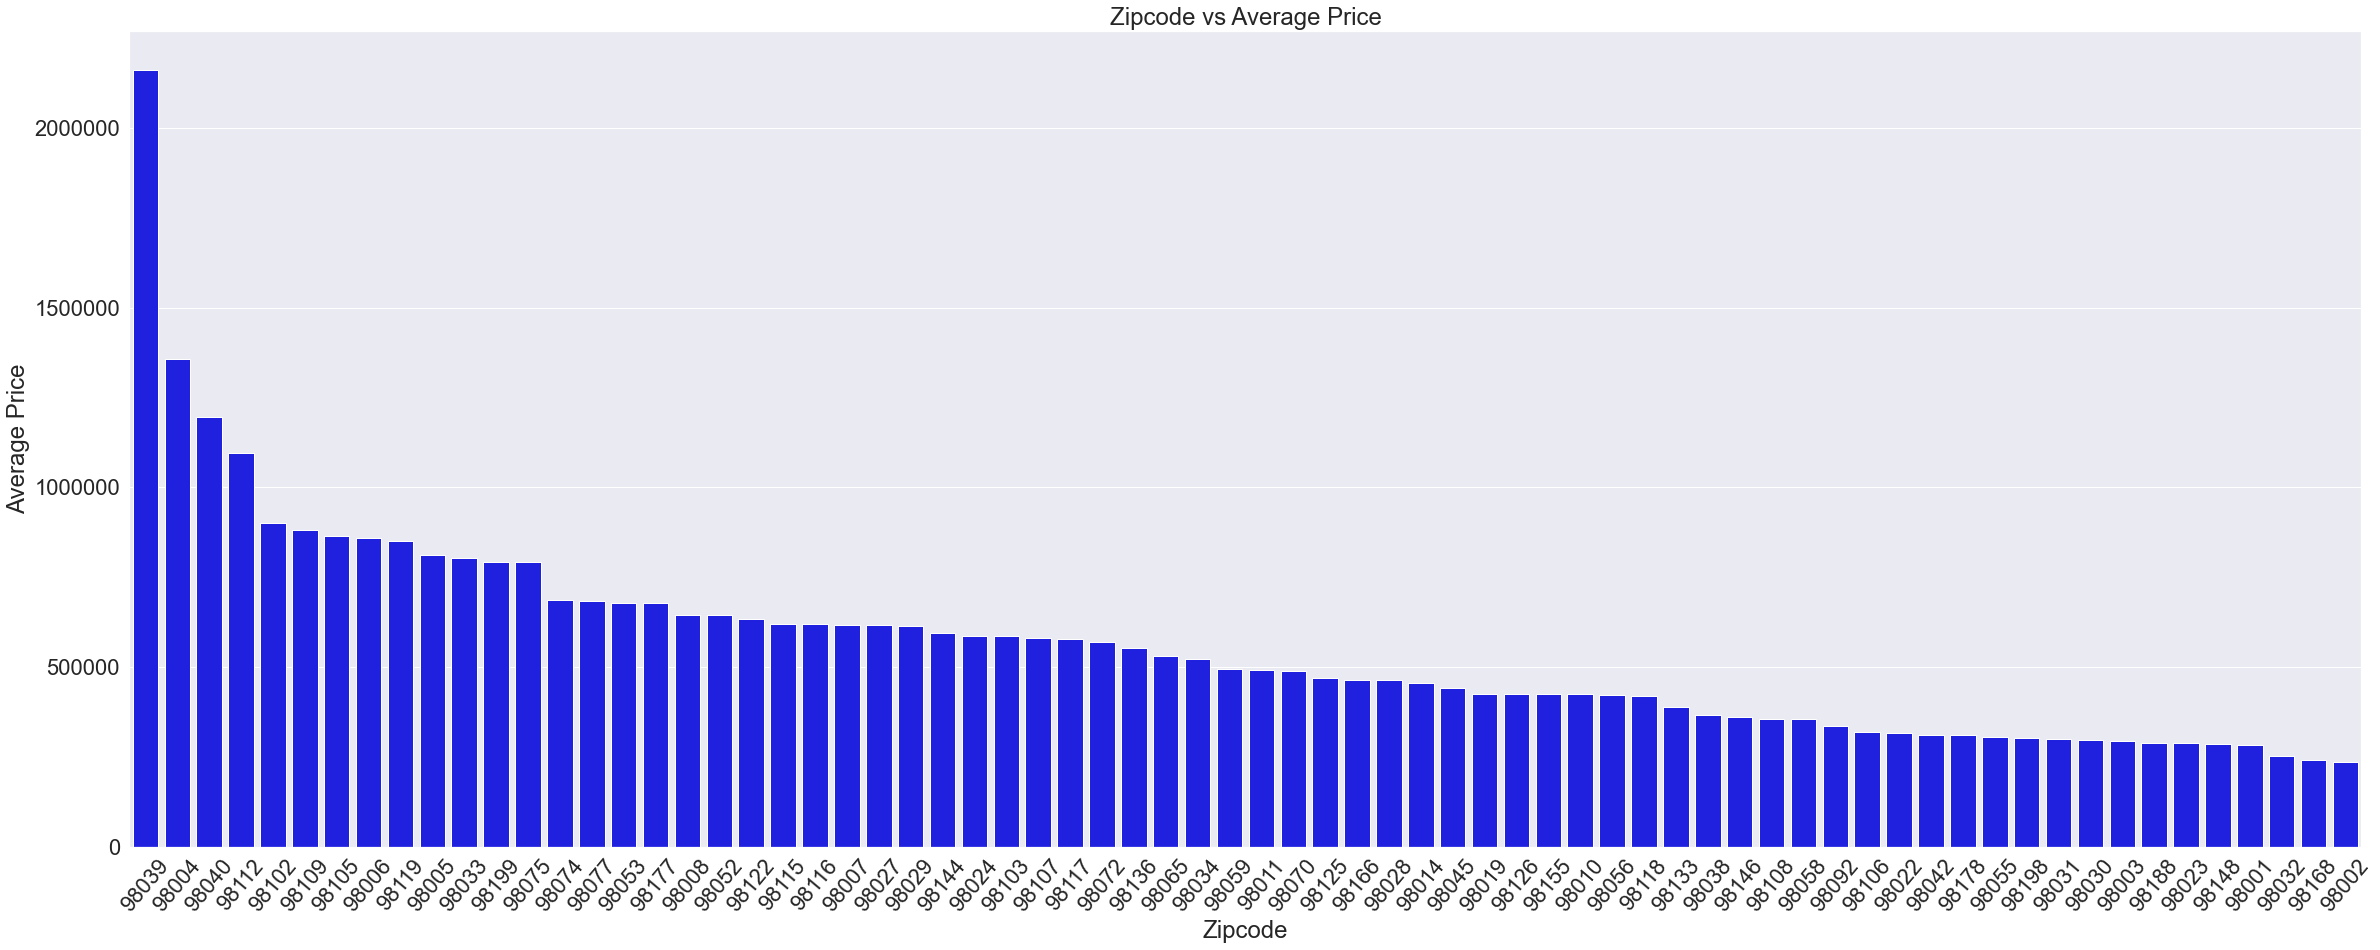

In [46]:
#plotting Zipcode vs Average Price
fig = plt.figure(figsize=(40, 15))
sns.set(font_scale = 2)
sns.barplot(x = 'Zipcode',
            y = 'price',
            data = location_group,
            color = 'blue',
            order = location_group.sort_values('price', ascending = False).Zipcode)

plt.title('Zipcode vs Average Price')
plt.xlabel('Zipcode')
plt.xticks(rotation=50)
plt.ylabel('Average Price')
plt.ticklabel_format(style='plain', axis='y')



In [47]:
kc_house_data.sort_values(by = 'bedrooms', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.00,33,1.75,1620,6000,1.00,NO,NONE,...,7,1040,580.0,1947,0.00,98103,47.69,-122.33,1330,4700
8748,1773100755,8/21/2014,520000.00,11,3.00,3000,4960,2.00,NO,NONE,...,7,2400,600.0,1918,1999.00,98106,47.56,-122.36,1420,4960
13301,627300145,8/14/2014,1150000.00,10,5.25,4590,10920,1.00,NO,AVERAGE,...,9,2500,2090.0,2008,0.00,98004,47.59,-122.11,2730,10400
19239,8812401450,12/29/2014,660000.00,10,3.00,2920,3745,2.00,NO,NONE,...,7,1860,1060.0,1913,0.00,98105,47.66,-122.32,1810,3745
15147,5566100170,10/29/2014,650000.00,10,2.00,3610,11914,2.00,NO,NONE,...,7,3010,600.0,1958,0.00,98006,47.57,-122.17,2040,11914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12472,1172000150,8/29/2014,238000.00,1,1.00,530,6350,1.00,NO,NONE,...,5,530,0.0,1941,0.00,98103,47.69,-122.36,1200,6350
13316,4356200120,10/23/2014,248000.00,1,1.00,790,12000,1.00,NO,NONE,...,6,790,0.0,1918,0.00,98118,47.51,-122.27,1900,6000
7010,203100460,9/24/2014,400000.00,1,1.00,530,13679,1.00,NO,NONE,...,6,530,0.0,1949,0.00,98053,47.64,-121.95,1930,20624
3578,1925069006,12/3/2014,355000.00,1,0.75,530,33278,1.00,NO,AVERAGE,...,4,530,0.0,1950,0.00,98074,47.64,-122.08,2830,14311


### Comparing size of houses and plots to price

2.) Size vs price

In this section of my notebook I will be comparing how the size of a house and its plot compare to the overall price of a home.  The plan is to first create a scatter plot that compares the square footage of a home to the price and plot a line of regression.  With that we will be able to see if on average homes tend to increase in price with more square footage.

In [48]:
# looking for any missing values in square footage
kc_house_data[kc_house_data['sqft_living'] == 'NaN']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


There are no values of NaN

In [49]:
kc_house_data[kc_house_data['sqft_living'] == '']

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


There are no empty values

Text(0.5, 1.0, 'Price of homes compared to their square footage of living space')

<Figure size 36000x36000 with 0 Axes>

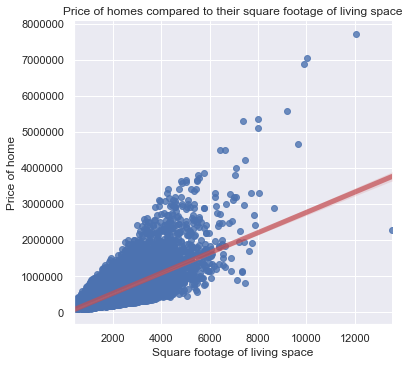

In [50]:
# scatter plot home price vs square footage
fig = plt.figure(figsize=(500, 500))
sns.set(font_scale = 1)
sns.lmplot(x = 'sqft_living',
           y = 'price',
           data = kc_house_data,
           line_kws={"color":"r","alpha":0.7,"lw":5})

plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Square footage of living space')
plt.ylabel('Price of home')
plt.title('Price of homes compared to their square footage of living space')

In [51]:
kc_house_data['sqft_living'].corr(kc_house_data['price'])

0.7019173021377596

you can clearly see there is a positive correlation between the size of a home, and the overall price of a home.

Text(0.5, 1.0, 'Price of homes compared to their square footage of land')

<Figure size 36000x36000 with 0 Axes>

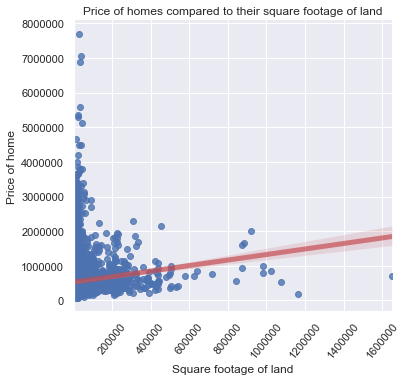

In [52]:
# scatter plot to determine the relationship between square feet of plot vs price
fig = plt.figure(figsize=(500, 500))
sns.set(font_scale = 1)
sns.lmplot(x = 'sqft_lot',
           y = 'price',
           data = kc_house_data,
           line_kws={"color":"r","alpha":0.7,"lw":5})

plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Square footage of land')
plt.xticks(rotation=50)
plt.ylabel('Price of home')
plt.title('Price of homes compared to their square footage of land')

In [53]:
kc_house_data['sqft_lot'].corr(kc_house_data['price'])

0.08987622099083861

As we can see here there is a slight positive correlation between square footage of the plot compared to price.
however comparing this to square footage of living space of the house, it would be more beneficial to concentrate on a larger living space rather than the amount of land.

# comparing amount of rooms to price

Here I will be comparing the amount of rooms to overall price. 

Text(0.5, 1.0, 'Price of homes compared to their number of bedrooms')

<Figure size 36000x36000 with 0 Axes>

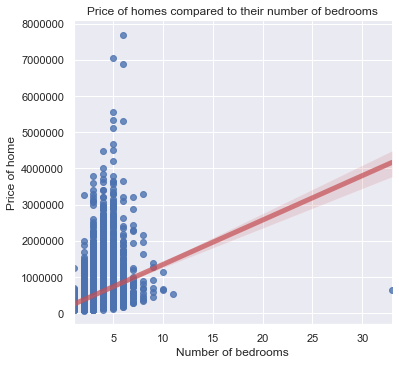

In [54]:
fig = plt.figure(figsize=(500, 500))
sns.set(font_scale = 1)
sns.lmplot(x = 'bedrooms',
           y = 'price',
           data = kc_house_data,
           line_kws={"color":"r","alpha":0.7,"lw":5})

plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Number of bedrooms')
plt.ylabel('Price of home')
plt.title('Price of homes compared to their number of bedrooms')

In [55]:
kc_house_data['bedrooms'].corr(kc_house_data['price'])

0.30878747195653267

There is a positive correlation between number of rooms and the price of a house.

Text(0.5, 1.0, 'Price of homes compared to their number of bathrooms')

<Figure size 36000x36000 with 0 Axes>

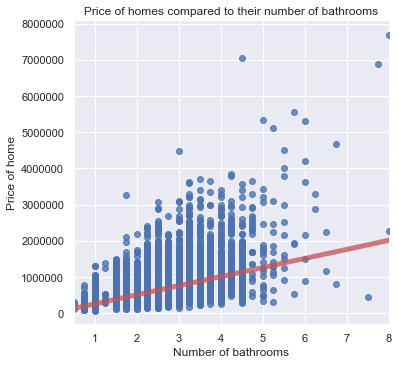

In [56]:
fig = plt.figure(figsize=(500, 500))
sns.set(font_scale = 1)
sns.lmplot(x = 'bathrooms',
           y = 'price',
           data = kc_house_data,
           line_kws={"color":"r","alpha":0.7,"lw":5})

plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Number of bathrooms')
plt.ylabel('Price of home')
plt.title('Price of homes compared to their number of bathrooms')

In [57]:
kc_house_data['bathrooms'].corr(kc_house_data['price'])

0.5259056214532006

### How does the age of a house, condition, and renovations effect the price of a house?

In this section of my notebook i will explore how the age of a house, the condition, and the renovations effect the price of a house.  Since there are too many years to plot the average home price of each year with a bar graph, I will use another scatter plot to show how the year effects the sale price.  The next step will be to look into the overall grade, or quality of the house.  In the above cells i removed the characters that were not numbers, and changed the datatype from object to integer.  To explore this data I will make 2 graphs, the first will show the average sale price for each grade, 1 through 13.  1 being the lowest and 13 being the highest.  

Text(0.5, 1.0, 'Price of homes compared to what year they were built')

<Figure size 36000x36000 with 0 Axes>

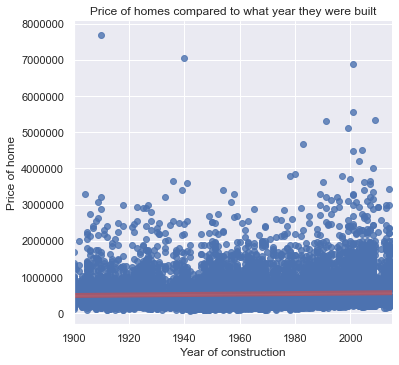

In [59]:
fig = plt.figure(figsize=(500, 500))
sns.set(font_scale = 1)
sns.lmplot(x = 'yr_built',
           y = 'price',
           data = kc_house_data,
           line_kws={"color":"r","alpha":0.7,"lw":5})

plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Year of construction')
plt.ylabel('Price of home')
plt.title('Price of homes compared to what year they were built')

In [60]:
#calculating correlation value of the year a house is built to its sale price
kc_house_data['yr_built'].corr(kc_house_data['price'])

0.05395333346519116

As we can see the correlation value is very insignificant when comparing the value of a home to the year built.

Text(0.5, 1.0, 'Price of homes compared to their grade')

<Figure size 36000x36000 with 0 Axes>

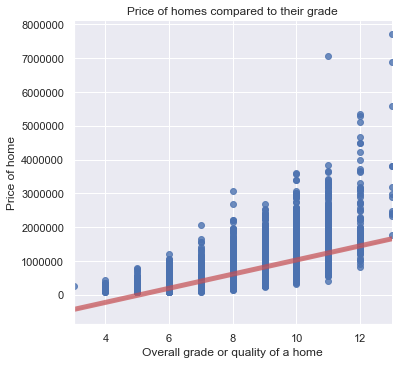

In [61]:
#plotting scatter plot for homes compared to their grade, 1 - 13
fig = plt.figure(figsize=(500, 500))
sns.set(font_scale = 1)
sns.lmplot(x = 'grade',
           y = 'price',
           data = kc_house_data,
           line_kws={"color":"r","alpha":0.7,"lw":5})

plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Overall grade or quality of a home')
plt.ylabel('Price of home')
plt.title('Price of homes compared to their grade')

In [62]:
#calculating correlation between grade and price
kc_house_data['grade'].corr(kc_house_data['price'])

0.667950771387645

There is a positive correlation between the grade of house, and the sale price.

The next step is to create a group for each grade, and calculate the average price for each grade.

In [68]:
#Creating a groupby of 'grade', with the average values of each column
pd.set_option('display.float_format', lambda x: '%.2f' % x)
grade_group = kc_house_data.groupby('grade').mean()

In [74]:
grade_group

,grade,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,2420069251.00,262000.00,1.00,0.75,520.00,12981.00,1.00,520.00,1920.00,0.00,98022.00,47.21,-122.00,1340.00,12233.00
1,4,4344408728.22,212001.85,1.59,0.91,680.74,15614.78,1.04,673.33,1936.26,110.00,98068.63,47.50,-122.17,1486.67,12896.63
2,5,3887594134.22,248523.97,2.39,1.11,983.33,24019.91,1.09,944.61,1935.45,42.06,98082.69,47.50,-122.20,1380.57,16122.43
3,6,4442552374.57,301916.57,2.69,1.24,1191.56,12646.95,1.11,1068.65,1942.47,86.27,98102.62,47.53,-122.26,1389.25,11020.92
4,7,4527336445.95,402594.57,3.26,1.83,1689.51,11769.88,1.30,1408.43,1963.62,74.71,98082.41,47.55,-122.23,1679.28,10616.00
5,8,4775134274.84,542986.80,3.48,2.35,2184.80,13514.01,1.67,1867.31,1980.39,88.24,98073.45,47.57,-122.21,2067.08,11371.26
6,9,4651165661.19,773738.22,3.77,2.66,2868.14,20638.52,1.85,2554.40,1988.42,102.09,98065.30,47.58,-122.17,2613.46,17401.71
7,10,4404625777.70,1072347.47,3.91,3.01,3520.30,28191.06,1.89,3112.09,1989.57,87.97,98061.30,47.59,-122.15,3036.89,21334.66
8,11,4164540550.76,1497792.38,4.16,3.50,4395.45,38372.79,1.96,3853.18,1992.15,79.60,98055.26,47.60,-122.15,3532.11,27743.16
9,12,3905934362.39,2202528.09,4.27,4.03,5479.02,54819.21,1.95,4647.49,1992.40,83.11,98045.26,47.60,-122.14,3955.99,39134.08


In [83]:
#grade_group = grade_group.rename_axis('grade').reset_index()

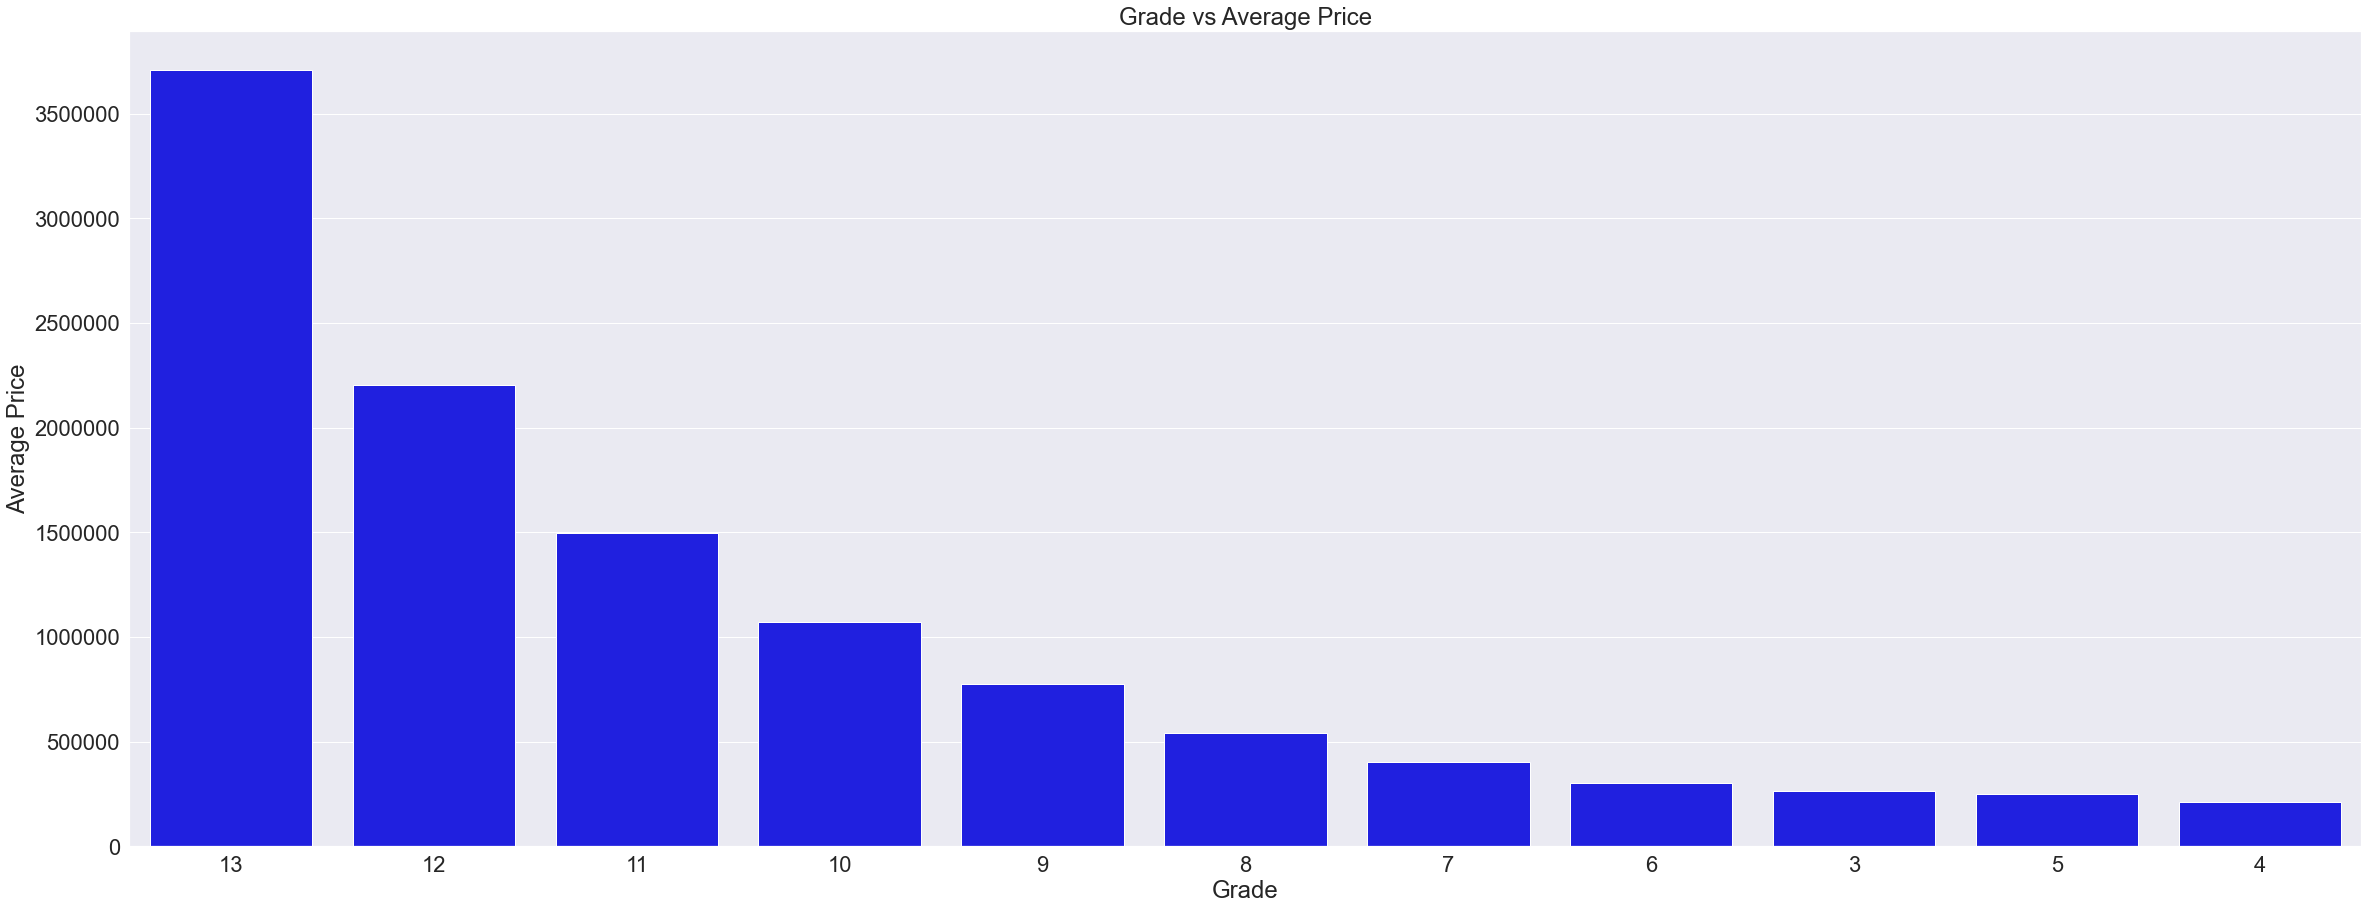

In [82]:
fig = plt.figure(figsize=(40, 15))
sns.set(font_scale = 2)
sns.barplot(x = 'grade',
            y = 'price',
            data = grade_group,
            color = 'blue',
            order = grade_group.sort_values('price', ascending = False).grade)

plt.title('Grade vs Average Price')
plt.xlabel('Grade')
plt.ylabel('Average Price')
plt.ticklabel_format(style='plain', axis='y')

As expected, the average price of a house with a higher grade is higher than the average cost of a house with a lower grade.